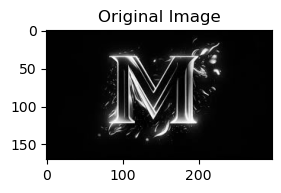

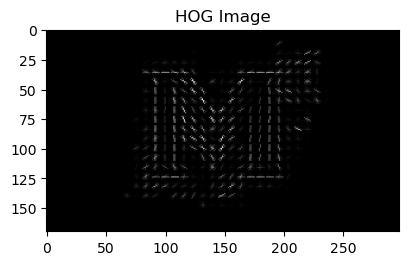

In [4]:
from skimage.feature import hog
from skimage import color, io

# Load an image
image = io.imread('C:/Users/naikm/Desktop/images (2).jfif')

# Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Compute HOG features
features, hog_image = hog(gray_image, visualize=True)

# Display the results
import matplotlib.pyplot as plt
plt.subplot(1, 2, 2)
plt.title('Original Image')
plt.imshow(gray_image, cmap=plt.cm.gray)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('HOG Image')
plt.imshow(hog_image, cmap=plt.cm.gray)
plt.show()


Contrast: [ 725.00047695  856.18661043  375.40079294  858.94678554 1441.67784646

  856.18661043  908.36347603  858.94678554 1768.20904362 1529.12461663

 1304.88981633 1606.18297014]

Dissimilarity: [ 8.76665342  9.84553414  6.14384476  9.7699904  12.8091326   9.84553414

  9.80523489  9.7699904  15.01672669 14.10940274 12.17210024 14.2342615 ]

Homogeneity: [0.67218085 0.63796284 0.68750529 0.64424545 0.63289222 0.63796284

 0.64143432 0.64424545 0.60712805 0.58910853 0.61351398 0.59542394]

Energy: [0.34840337 0.33598682 0.34884937 0.33621334 0.33518903 0.33598682

 0.3339657  0.33621334 0.32471165 0.31460841 0.32247438 0.3149358 ]

Correlation: [0.84941914 0.82304784 0.92219622 0.82247741 0.70141132 0.82304784

 0.81266898 0.82247741 0.63481817 0.68641641 0.73223686 0.67061387]


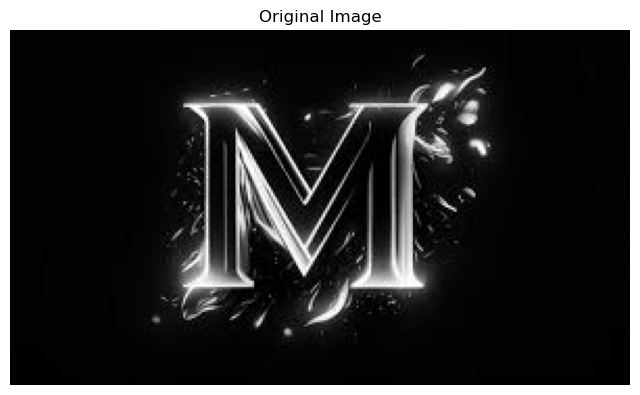

In [6]:
import numpy as np
import cv2
from skimage.feature import graycomatrix, graycoprops
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('C:/Users/naikm/Desktop/images (2).jfif', cv2.IMREAD_GRAYSCALE)

# Compute the GLCM
# Define the distances and angles for GLCM calculation
distances = [1, 2, 3]  # Distance between pixels
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # Angles in radians (0, 45, 90, 135 degrees)

# Compute the GLCM
glcm = graycomatrix(image, distances=distances, angles=angles, symmetric=True, normed=True)

# Extract GLCM properties
properties = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation']

# Create a dictionary to store the extracted features
features = {}

for prop in properties:
    features[prop] = graycoprops(glcm, prop).flatten()

# Print extracted features
for prop in properties:
    print(f'{prop.capitalize()}: {features[prop]}')

# Display the original image
plt.figure(figsize=(8, 8))
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()


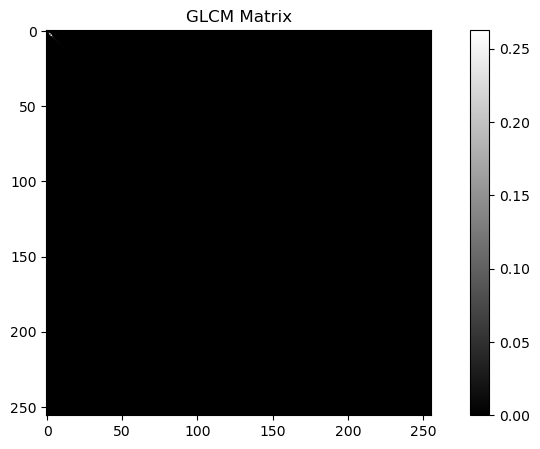

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_glcm(image, distance, angle):
    rows, cols = image.shape
    max_gray = 256  # Assuming 8-bit grayscale images

    glcm = np.zeros((max_gray, max_gray), dtype=np.float64)

    for i in range(rows - distance):
        for j in range(cols - distance):
            row = image[i, j]
            col = image[i + int(distance * np.cos(angle)), j + int(distance * np.sin(angle))]
            glcm[row, col] += 1

    glcm = glcm / np.sum(glcm)
    return glcm

# Load the image
image = cv2.imread('C:/Users/naikm/Desktop/images (2).jfif', cv2.IMREAD_GRAYSCALE)

# Compute the GLCM
distance = 1
angle = 0  # Angle in radians (0 degrees)

glcm = compute_glcm(image, distance, angle)

# Display the GLCM matrix
plt.figure(figsize=(10, 5))
plt.imshow(glcm, cmap='gray')
plt.title('GLCM Matrix')
plt.colorbar()
plt.show()


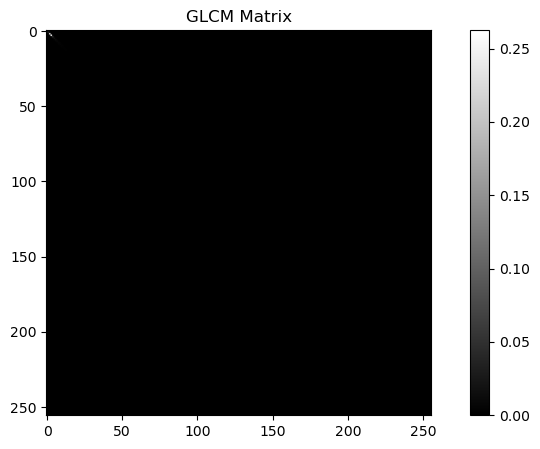

In [8]:
import cv2
import numpy as np
from skimage.feature import graycomatrix
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('C:/Users/naikm/Desktop/images (2).jfif', cv2.IMREAD_GRAYSCALE)

# Define the distances and angles
distances = [1]  # distance of 1 pixel
angles = [0]  # angle of 0 degrees (horizontal)

# Compute the GLCM
glcm = graycomatrix(image, distances=distances, angles=angles, symmetric=True, normed=True)

# Display the GLCM matrix
plt.figure(figsize=(10, 5))
plt.imshow(glcm[:, :, 0, 0], cmap='gray')
plt.title('GLCM Matrix')
plt.colorbar()
plt.show()


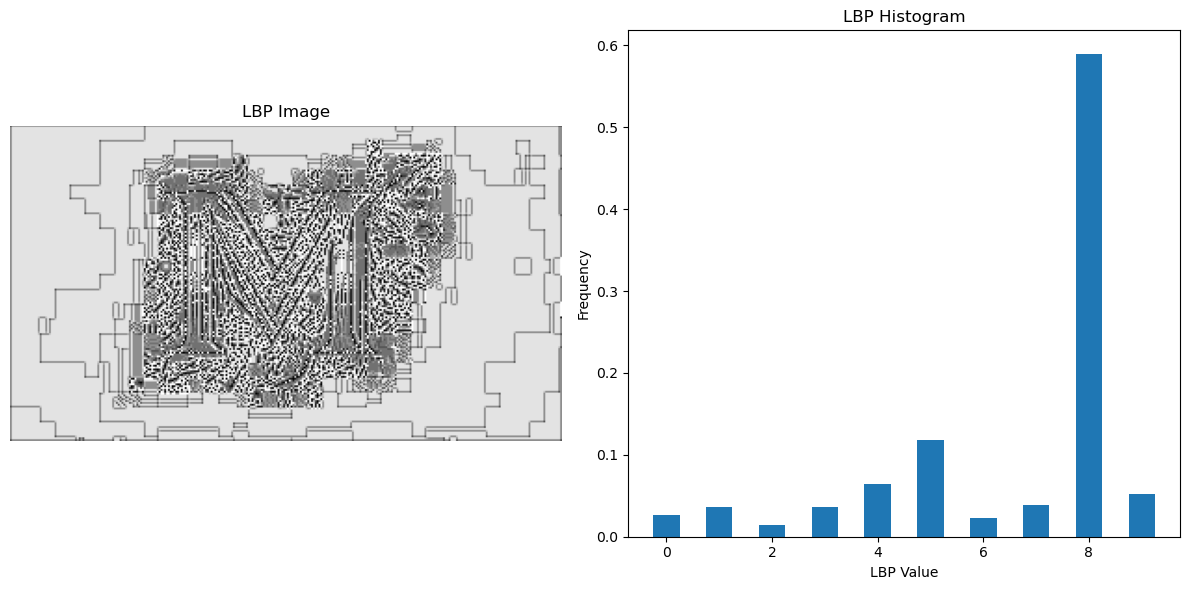

In [9]:
import cv2
import numpy as np
from skimage.feature import local_binary_pattern
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('C:/Users/naikm/Desktop/images (2).jfif', cv2.IMREAD_GRAYSCALE)

# Define parameters for LBP
radius = 1
n_points = 8 * radius

# Compute LBP
lbp = local_binary_pattern(image, n_points, radius, method='uniform')

# Compute the histogram of LBP values
hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))

# Normalize the histogram
hist = hist.astype(float)
hist /= (hist.sum() + 1e-6)  # Add a small constant to avoid division by zero

# Display the LBP image and histogram
plt.figure(figsize=(12, 6))

# LBP Image
plt.subplot(1, 2, 1)
plt.imshow(lbp, cmap='gray')
plt.title('LBP Image')
plt.axis('off')

# LBP Histogram
plt.subplot(1, 2, 2)
plt.bar(range(len(hist)), hist, width=0.5)
plt.title('LBP Histogram')
plt.xlabel('LBP Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
